<a href="https://colab.research.google.com/github/Ksenia-90/probability_theory/blob/lesson_8_project/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Курсовая работа**

##**Тема: "Анализ средней продолжительности фильма в зависимости от жанра"**

Данные для исследования и анализа взяты из открытого источника: 
* https://www.imdb.com/interfaces/ 
* https://datasets.imdbws.com/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
titel = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/title.basics.tsv.gz', sep = '\t', encoding='utf-8' )

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
titel.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [ ]:
print(titel.shape)

(8300681, 9)


In [ ]:
print(list(titel.columns))

['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres']


Выдвинем 2 гипотизы:
* Гипотеза H0: средняя продолжительность фильма не зависит от жанра
* Гипотеза H1: средняя продолжительность фильма зависит от жанра.

Выбирем только категорию 'Movie'

In [ ]:
title_types = titel.titleType.unique()
print(title_types)

['short' 'movie' 'tvEpisode' 'tvSeries' 'tvShort' 'tvMovie' 'tvMiniSeries'
 'tvSpecial' 'video' 'videoGame' 'radioEpisode' 'tvPilot']


In [ ]:
movies= titel[titel.titleType == 'movie']
movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama
625,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama


In [ ]:
#удалим записи которые содержат NaN
movies = movies.dropna()
movies = movies[movies.runtimeMinutes != '\\N']
movies['runtimeMinutes'] = movies['runtimeMinutes'].apply(lambda x: int(x))
movies = movies[movies.genres != '\\N']

In [ ]:
#удаляем колонки котрые в данном проекте для нас не значимы.
movies.drop(movies.columns [[3,4, 5, 6]], axis = 1, inplace = True)

In [ ]:
movies.head()

,tconst,titleType,primaryTitle,runtimeMinutes,genres
570,tt0000574,movie,The Story of the Kelly Gang,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,90,Drama
672,tt0000679,movie,The Fairylogue and Radio-Plays,120,"Adventure,Fantasy"
1172,tt0001184,movie,Don Juan de Serrallonga,58,"Adventure,Drama"
1246,tt0001258,movie,The White Slave Trade,45,Drama


In [ ]:
# выберем только те фильмы, продолжительность которых от 90 до 240 минут.
movies = movies[(movies.runtimeMinutes > 89) & (movies.runtimeMinutes < 241)]
movies.head()

,tconst,titleType,primaryTitle,runtimeMinutes,genres
587,tt0000591,movie,The Prodigal Son,90,Drama
672,tt0000679,movie,The Fairylogue and Radio-Plays,120,"Adventure,Fantasy"
2076,tt0002101,movie,Cleopatra,100,"Drama,History"
2418,tt0002445,movie,Quo Vadis?,120,"Drama,History"
2425,tt0002452,movie,The Independence of Romania,120,"History,War"


In [ ]:
genres = tuple(movies.genres.unique())
print(genres[:25])

('Drama', 'Adventure,Fantasy', 'Drama,History', 'History,War', 'Crime,Drama,Mystery', 'Biography,Drama,History', 'Adventure,Drama,History', 'Crime,Drama', 'Action', 'Action,Adventure,Biography', 'Action,Adventure,Drama', 'Drama,Western', 'Drama,History,War', 'Drama,Sci-Fi', 'Crime,Drama,Horror', 'Documentary,War', 'Comedy', 'Action,Adventure,Sci-Fi', 'Documentary', 'Drama,History,Romance', 'Action,Drama,War', 'Adventure', 'Mystery', 'History', 'Adventure,Fantasy,Sci-Fi')


In [ ]:
def get_target_genres(data, target):
    target_genres = []
    for genre in data:
        tmp_list = str(genre).lower().split(',') 
        for item in tmp_list:
            if item in target:
                target_genres.append(str(genre))
    return target_genres

In [ ]:
columns = ['tconst', 'primaryTitle', 'runtimeMinutes', 'genres']

fantasy_genres = get_target_genres(data=genres, target=('fantasy'))
fantasy_movies = movies[movies.genres.isin(fantasy_genres)].loc[:, columns].reset_index(drop=True)

horror_genres = get_target_genres(data=genres, target=('horror'))
horror_movies = movies[movies.genres.isin(horror_genres)].loc[:, columns].reset_index(drop=True)

action_genres = get_target_genres(data=genres, target=('action'))
action_movies = movies[movies.genres.isin(action_genres)].loc[:, columns].reset_index(drop=True)

In [ ]:
fantasy = tuple(set(fantasy_movies.tconst) - set(horror_movies.tconst) - set(action_movies.tconst))
horror = tuple(set(horror_movies.tconst) - set(fantasy_movies.tconst) - set(action_movies.tconst))
action = tuple(set(action_movies.tconst) - set(fantasy_movies.tconst) - set(horror_movies.tconst))

Очистим жанры выбрав один тип

In [ ]:
fantasy_only = fantasy_movies[fantasy_movies.tconst.isin(fantasy)].reset_index(drop=True)
fantasy_only['genres'] = 'fantasy'

horror_only = horror_movies[horror_movies.tconst.isin(horror)].reset_index(drop=True)
horror_only['genres'] = 'horror'

action_only = action_movies[action_movies.tconst.isin(action)].reset_index(drop=True)
action_only['genres'] = 'action'

In [ ]:
print(f'Fantasy only: {fantasy_only.shape[0]} movies')
print(f'Horror only: {horror_only.shape[0]} movies')
print(f'Action only: {action_only.shape[0]} movies')

Fantasy only: 3815 movies
Horror only: 8392 movies
Action only: 18776 movies


In [ ]:
horror_only.head()

,tconst,primaryTitle,runtimeMinutes,genres
0,tt0005529,Blind Justice,100,horror
1,tt0010307,J'accuse!,166,horror
2,tt0010502,Nachtgestalten,106,horror
3,tt0010559,Die Pest in Florenz,92,horror
4,tt0011318,Der Hund von Baskerville - 6. Teil: Das Haus o...,157,horror


Возьмем из каждой группы по 3000 наблюдений.

In [ ]:
n_sample = 3000

y_fantasy = fantasy_only.sample(n=n_sample, random_state=42).runtimeMinutes.values
y_horror= horror_only.sample(n=n_sample, random_state=42).runtimeMinutes.values
y_action = action_only.sample(n=n_sample, random_state=42).runtimeMinutes.values

In [ ]:
y_fantasy_mean = y_fantasy.mean()
y_horror_mean = y_horror.mean()
y_action_mean = y_action.mean()
print(f'Cреднее значение:') 
print(f'y_fantasy_mean = {np.round(y_fantasy_mean, 3)}')
print(f'y_horror_mean =  {np.round(y_horror_mean, 3)}')
print(f'y_action_mean   =  {np.round(y_action_mean, 3)}')

Cреднее значение:
y_fantasy_mean = 106.495
y_horror_mean =  100.802
y_action_mean   =  111.868


In [ ]:
films = np.concatenate([y_fantasy, y_horror, y_action])
films_mean = np.mean(films)
print(f'Cреднее значение общее {np.round(films_mean, 3)}')

Cреднее значение общее 106.388


In [ ]:
n_1 = len(y_fantasy)
n_2 = len(y_horror)
n_3 = len(y_action)

n = n_1 + n_2 + n_3
k = 3

print(f'Общее значение: {n}')

Общее значение: 9000


In [ ]:
S2_b = n_1 * (y_fantasy_mean - films_mean) ** 2 + n_2 * (y_horror_mean - films_mean) ** 2 + n_3 * (y_action_mean - films_mean) ** 2
print(f'S2_b = {np.round(S2_b, 3)}')

S2_b = 183758.08


In [ ]:
S2_w = ((y_fantasy - y_fantasy_mean)**2).sum() + ((y_horror - y_horror_mean) ** 2).sum() + ((y_action - y_action_mean) ** 2).sum()
print(f'S2_w = {np.round(S2_w, 3)}')

S2_w = 3319831.918


In [ ]:
S2_b + S2_w, ((films - films_mean) ** 2).sum()

(3503589.9982222226, 3503589.998222222)

In [ ]:
k = 3
n = n_1 + n_2 + n_3
k_1 = k-1
k_2 = n - k
k_1, k_2, n

(2, 8997, 9000)

In [ ]:
sigma2_b = S2_b / (k - 1)
sigma2_w = S2_w / (n - k)

sigma2_b, sigma2_w

(91879.04011111129, 368.99321084806047)

In [ ]:
T = sigma2_b / sigma2_w
T

248.99926993221595

In [ ]:
alpha = 0.05
F_crit = stats.f.ppf(1 - alpha, (k - 1), (n - k))
F_crit

2.9967299843896065

In [ ]:
p = 1 - stats.f.cdf(T, k_1,k_2)
p

1.1102230246251565e-16

**Вывод:Согласно проведенному анализу мы принимаем гипотизу Н1: средняя продолжительность фильма зависит от жанра, для фильмов во времееной категории от 90-240 мин. и жанров фантаза, ужасы, боевик.**

#**Проведем анализ с помощью логистической регресси.**
Создадим очишенный датасет в котором содержатся только фильмы 2 жанров (horror и action) с продолжительностью от 90 до 240 минут.

In [ ]:
movies_df = pd.concat([horror_only, action_only])

In [ ]:
movies_df.head()

,tconst,primaryTitle,runtimeMinutes,genres
0,tt0005529,Blind Justice,100,horror
1,tt0010307,J'accuse!,166,horror
2,tt0010502,Nachtgestalten,106,horror
3,tt0010559,Die Pest in Florenz,92,horror
4,tt0011318,Der Hund von Baskerville - 6. Teil: Das Haus o...,157,horror


In [ ]:
movies_df['genres'] = movies_df['genres'].replace({'horror': 0, 'action': 1})

In [ ]:
runtimeMinutes = tuple(movies_df.runtimeMinutes.unique())
print(runtimeMinutes[:200])

(100, 166, 106, 92, 157, 107, 90, 94, 105, 128, 133, 93, 110, 108, 98, 224, 104, 99, 97, 113, 91, 103, 165, 117, 129, 115, 95, 101, 96, 109, 134, 119, 112, 120, 102, 140, 122, 137, 121, 118, 130, 183, 127, 160, 116, 146, 111, 126, 114, 156, 144, 125, 124, 141, 135, 180, 123, 161, 177, 172, 131, 147, 151, 142, 175, 169, 168, 148, 132, 136, 143, 139, 145, 158, 167, 170, 163, 153, 159, 162, 155, 150, 154, 138, 240, 186, 195, 199, 210, 174, 178, 222, 152, 198, 203, 192, 149, 173, 171, 220, 223, 200, 230, 185, 215, 213, 217, 226, 194, 216, 225, 227, 231, 228, 229, 236, 219, 212, 211, 205, 237, 196, 197, 218, 201, 221, 207, 239, 208, 164, 204, 184, 176, 181, 189, 193, 179, 187, 214, 190, 188, 202, 182, 232)


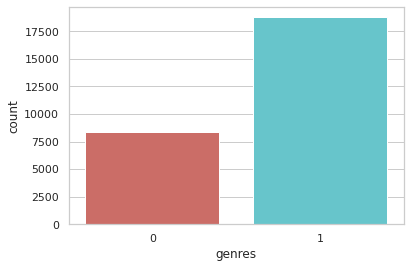

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot (x='genres', data = movies_df, palette = 'hls')
plt.show()
plt.savefig('count-plot')

In [ ]:
count_action = len(movies_df[movies_df['genres']==1])
count_horror = len(movies_df[movies_df['genres']==0])
pct_action = count_action/(count_action+count_horror)
print("percentage action", pct_action*100)
pct_horror = count_horror/(count_action+count_horror)
print("percentage horror", pct_horror*100)

percentage action 69.11071849234393
percentage horror 30.889281507656065


In [ ]:
movies_df.dtypes

tconst            object
primaryTitle      object
runtimeMinutes     int64
genres             int64
dtype: object

In [ ]:
movies_df.drop(movies_df.columns [[0,1]], axis = 1, inplace = True)

In [ ]:
y = movies_df['genres']
X = movies_df.drop('genres', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=21)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19017, 1), (8151, 1), (19017,), (8151,))

In [ ]:
df_balanc = pd.concat([X_train, y_train], axis=1)

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.602352
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.026     
Dependent Variable: genres           AIC:              32731.4251
Date:               2021-10-08 09:04 BIC:              32739.6349
No. Observations:   27168            Log-Likelihood:   -16365.   
Df Model:           0                LL-Null:          -16796.   
Df Residuals:       27167            LLR p-value:      nan       
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                                       
------------------------------------------------------------------
                 Coef.   Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
runtimeMinutes   0.0081    0.0001  66.3495  0.0000  0.0079  0.0084



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.69


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[   0 2512]
 [   0 5639]]


In [ ]:
metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

0.8178390137781002